## Organize

In [1]:
library(tidyverse)
library(rstatix)
#library(ggsignif)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter




In [2]:
# theme with all the settings to make ggplot look nice
pub_theme <- function(text.size){
    theme(
        # text settings
        text = element_text(size = text.size),
        plot.title = element_text(hjust = 0.5),
        # background color
        panel.background = element_rect(fill = NA),
        # border color
        panel.border = element_blank(),
        axis.line = element_line(),
        # get rid of axis
        panel.grid.major.x = element_blank(),
        panel.grid.major.y = element_blank(),
        panel.grid.minor.x = element_blank(),
        panel.grid.minor.y = element_blank(),
        # legend settings
        legend.background = element_blank()
    )
}

In [11]:
df <- read.csv('data_formatted/apen.csv')

In [88]:
joints <- read.csv('data_formatted/joints_labeled.csv')

In [12]:
head(df)

,unique_id,group,dance_group,measure,apen,limb,movement,limb_move,side,side_limb_move
,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,pddance001_record01,PD,tango,ap-hip_lt-flexion_(deg),0.28195412,hip,flexion,hip_flexion,left,left_hip_flexion
2,pddance001_record02,PD,tango,ap-hip_lt-flexion_(deg),0.17633145,hip,flexion,hip_flexion,left,left_hip_flexion
3,pddance002_record02,PD,line,ap-hip_lt-flexion_(deg),0.08686219,hip,flexion,hip_flexion,left,left_hip_flexion
4,pddance002_record03,PD,foxtrot,ap-hip_lt-flexion_(deg),0.14133672,hip,flexion,hip_flexion,left,left_hip_flexion
5,pddance002_record04,PD,foxtrot,ap-hip_lt-flexion_(deg),0.20238947,hip,flexion,hip_flexion,left,left_hip_flexion
6,pddance002_record05,PD,waltz,ap-hip_lt-flexion_(deg),0.19261587,hip,flexion,hip_flexion,left,left_hip_flexion


In [13]:
# separate left and right into separate columns
df.lr <- df %>% 
            select(unique_id, group, dance_group, side, limb_move, apen) %>% 
            filter(side == 'left') %>% 
            rename(left = apen)
df.lr$right <- df %>% 
            filter(side == 'right') %>%
            pull(apen)

# separate PD and OA for easier analysis
pd.lr <- df.lr %>% filter(group=='PD')
oa.lr <- df.lr %>% filter(group=='OA')

# ApEn

In [8]:
record <- read.csv('data_formatted/dance_recordings.csv')

In [14]:
df <- df %>% separate(col=unique_id, sep='_',into=c('id','record'), remove=FALSE)
df %>% head

,unique_id,id,record,group,dance_group,measure,apen,limb,movement,limb_move,side,side_limb_move
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,pddance001_record01,pddance001,record01,PD,tango,ap-hip_lt-flexion_(deg),0.28195412,hip,flexion,hip_flexion,left,left_hip_flexion
2,pddance001_record02,pddance001,record02,PD,tango,ap-hip_lt-flexion_(deg),0.17633145,hip,flexion,hip_flexion,left,left_hip_flexion
3,pddance002_record02,pddance002,record02,PD,line,ap-hip_lt-flexion_(deg),0.08686219,hip,flexion,hip_flexion,left,left_hip_flexion
4,pddance002_record03,pddance002,record03,PD,foxtrot,ap-hip_lt-flexion_(deg),0.14133672,hip,flexion,hip_flexion,left,left_hip_flexion
5,pddance002_record04,pddance002,record04,PD,foxtrot,ap-hip_lt-flexion_(deg),0.20238947,hip,flexion,hip_flexion,left,left_hip_flexion
6,pddance002_record05,pddance002,record05,PD,waltz,ap-hip_lt-flexion_(deg),0.19261587,hip,flexion,hip_flexion,left,left_hip_flexion


In [15]:
df.means <- df %>% group_by(id, group, dance_group, side, limb_move) %>% summarize(apen=mean(apen), n())
df.means %>% head

`summarise()` has grouped output by 'id', 'group', 'dance_group', 'side'. You can override using the `.groups` argument.



id,group,dance_group,side,limb_move,apen,n()
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>
pddance001,PD,tango,left,hip_abduction,0.61697711,2
pddance001,PD,tango,left,hip_flexion,0.22914278,2
pddance001,PD,tango,left,hip_rotation_ext,0.04364859,2
pddance001,PD,tango,left,knee_flexion,0.11785455,2
pddance001,PD,tango,right,hip_abduction,0.46963949,2
pddance001,PD,tango,right,hip_flexion,0.33044038,2


In [16]:
df.means <- df.means %>% filter(dance_group=='foxtrot' | dance_group=='tango' | dance_group=='line')

In [17]:
pd <- df.means %>% filter(group == 'PD')
oa <- df.means %>% filter(group == 'OA')

## Assumptions

Source: [T-test in R at Datanovia](https://www.datanovia.com/en/lessons/t-test-in-r/#assumptions-and-preliminary-tests-1)

### Outliers - pd pass, oa fail

In [18]:
pd %>% group_by(limb_move, side) %>% identify_outliers(apen)

side,limb_move,id,group,dance_group,apen,n(),is.outlier,is.extreme
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<lgl>,<lgl>
right,hip_abduction,pddance002,PD,foxtrot,0.1665234,2,TRUE,FALSE
right,hip_abduction,pddance007,PD,line,0.6758345,1,TRUE,FALSE
left,hip_flexion,pddance005,PD,tango,0.3782397,2,TRUE,FALSE


No extreme outliers

In [19]:
oa %>% group_by(limb_move, side) %>% identify_outliers(apen)

side,limb_move,id,group,dance_group,apen,n(),is.outlier,is.extreme
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<lgl>,<lgl>
left,hip_abduction,pddancecon005,OA,line,0.76779445,2,TRUE,FALSE
right,hip_abduction,pddancecon005,OA,line,0.85432486,2,TRUE,TRUE
right,hip_rotation_ext,pddancecon001,OA,line,0.04403799,1,TRUE,FALSE
right,hip_rotation_ext,pddancecon005,OA,line,0.59728504,2,TRUE,TRUE
left,knee_flexion,pddancecon001,OA,line,0.07861025,1,TRUE,TRUE
left,knee_flexion,pddancecon005,OA,line,0.27163057,2,TRUE,TRUE


4 extreme outliers in right hip abduction and left knee flexion

### Normality - pd pass, oa fail

In [20]:
pd %>% group_by(limb_move, side) %>% shapiro_test(apen)

side,limb_move,variable,statistic,p
<chr>,<chr>,<chr>,<dbl>,<dbl>
left,hip_abduction,apen,0.9366158,0.5160068
right,hip_abduction,apen,0.9346298,0.4949412
left,hip_flexion,apen,0.9339709,0.4880651
right,hip_flexion,apen,0.9144722,0.3131440
left,hip_rotation_ext,apen,0.8906992,0.1726771
right,hip_rotation_ext,apen,0.9800083,0.9652125
left,knee_flexion,apen,0.9692313,0.8836277
right,knee_flexion,apen,0.9221469,0.3752095


Passed

In [21]:
oa %>% group_by(limb_move, side) %>% shapiro_test(apen)

side,limb_move,variable,statistic,p
<chr>,<chr>,<chr>,<dbl>,<dbl>
left,hip_abduction,apen,0.8986477,0.40245668
right,hip_abduction,apen,0.7471201,0.02798446
left,hip_flexion,apen,0.9302632,0.59816629
right,hip_flexion,apen,0.8690662,0.26266327
left,hip_rotation_ext,apen,0.9373628,0.64735863
right,hip_rotation_ext,apen,0.7386856,0.02330439
left,knee_flexion,apen,0.9261850,0.57059624
right,knee_flexion,apen,0.9354277,0.63381976


Right hip abduction and right hip rotation are not normally distributed

### Equality of variance - passed

In [22]:
pd %>%  group_by(limb_move) %>% levene_test(apen ~ side)

Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”
Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”
Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”
Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”


limb_move,df1,df2,statistic,p
<chr>,<int>,<int>,<dbl>,<dbl>
hip_abduction,1,18,0.00334934,0.9544870
hip_flexion,1,18,0.09383228,0.7628755
hip_rotation_ext,1,18,0.00215126,0.9635168
knee_flexion,1,18,2.74289924,0.1150159


Passed equality of variance

In [23]:
oa %>%  group_by(limb_move) %>% levene_test(apen ~ side)

Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”
Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”
Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”
Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”


limb_move,df1,df2,statistic,p
<chr>,<int>,<int>,<dbl>,<dbl>
hip_abduction,1,8,0.0008896456,0.9769358
hip_flexion,1,8,0.6159973344,0.4551500
hip_rotation_ext,1,8,0.3397390499,0.5760367
knee_flexion,1,8,0.7948333405,0.3986628


Passed equality of variance

### Summary

Summary of assumptions for testing left vs right body movement
* P = Passed
* F = Failed
* L = Left
* R = Right

|                   | Hip Abduction | Hip Flexion | Hip Rotation | Knee Flexion     |
| ----------------- | ------------- | ----------- | ------------ | ---------------- |
| Normality (PD)    | L: P, R: P    | L: P, R: P  | L: P, R: P   | L: P, R: P       |
| Eq. Variance (PD) | P             | P           | P            | P                | 
| Outliers (PD)     | 0             | 0           | 0            | 0                |
| Effect size (PD)  | Moderate      | Large       | Small        | Large            |
| ----------------- | ------------- | ----------- | ------------ | ---------------- |
| Normality (OA)    | L: P, R: F    | L: P, R: P  | L: P, R: F   | L: P, R: P       |
| Eq. Variance (OA) | P             | P           | P            | P                |
| Outliers (OA)     | 1 in right    | 0           | 1 in right   | 2 in left        |
| Effect size (OA)  | Negligible    | Moderate    | Negligible   | Negligible       |



## Effect size

In [24]:
pd %>% group_by(limb_move) %>% cohens_d(apen ~ side, var.equal = TRUE)

,.y.,group1,group2,effsize,limb_move,n1,n2,magnitude
,<chr>,<chr>,<chr>,<dbl>,<chr>,<int>,<int>,<ord>
1,apen,left,right,0.5181636,hip_abduction,10,10,moderate
2,apen,left,right,-0.9374159,hip_flexion,10,10,large
3,apen,left,right,-0.2223113,hip_rotation_ext,10,10,small
4,apen,left,right,-1.1963043,knee_flexion,10,10,large


In [25]:
oa %>% group_by(limb_move) %>% cohens_d(apen ~ side, var.equal = TRUE)

,.y.,group1,group2,effsize,limb_move,n1,n2,magnitude
,<chr>,<chr>,<chr>,<dbl>,<chr>,<int>,<int>,<ord>
1,apen,left,right,-0.01146745,hip_abduction,5,5,negligible
2,apen,left,right,-0.51814563,hip_flexion,5,5,moderate
3,apen,left,right,-0.15988486,hip_rotation_ext,5,5,negligible
4,apen,left,right,0.06154704,knee_flexion,5,5,negligible


## t test

In [26]:
df.means2 <- df.means %>% mutate('limb_move' = factor(limb_move))

In [27]:
df.means.l <- df.means %>% filter(side == 'left')
df.means.r <- df.means %>% filter(side == 'right')

In [28]:
df.means.l$right <- df.means.r$apen
pd <- df.means.l %>% filter(group == 'PD') %>% mutate(left=apen)
oa <- df.means.l %>% filter(group == 'OA') %>% mutate(left=apen)

In [29]:
pd.result <- by(pd, list(pd$limb_move), 
    function(x) t.test(x$left, x$right, mu=0, alt="two.sided",conf.level = 0.95, var.equal=TRUE))
pd.result

: hip_abduction

	Two Sample t-test

data:  x$left and x$right
t = 1.1586, df = 18, p-value = 0.2617
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.05274191  0.18244820
sample estimates:
mean of x mean of y 
0.4741398 0.4092866 

------------------------------------------------------------ 
: hip_flexion

	Two Sample t-test

data:  x$left and x$right
t = -2.0961, df = 18, p-value = 0.05047
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1460232654  0.0001668739
sample estimates:
mean of x mean of y 
0.2004674 0.2733956 

------------------------------------------------------------ 
: hip_rotation_ext

	Two Sample t-test

data:  x$left and x$right
t = -0.4971, df = 18, p-value = 0.6251
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.15584612  0.09620728
sample estimates:
mean of x mean of y 
0.2167461 0.2465655 

----------

In [30]:
oa.result <- by(oa, list(oa$limb_move), 
    function(x) t.test(x$left, x$right, mu=0, alt="two.sided",conf.level = 0.95, var.equal=TRUE))
oa.result

: hip_abduction

	Two Sample t-test

data:  x$left and x$right
t = -0.018132, df = 8, p-value = 0.986
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.3130084  0.3081246
sample estimates:
mean of x mean of y 
0.4492987 0.4517406 

------------------------------------------------------------ 
: hip_flexion

	Two Sample t-test

data:  x$left and x$right
t = -0.81926, df = 8, p-value = 0.4364
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.3288288  0.1564297
sample estimates:
mean of x mean of y 
0.1161779 0.2023774 

------------------------------------------------------------ 
: hip_rotation_ext

	Two Sample t-test

data:  x$left and x$right
t = -0.2528, df = 8, p-value = 0.8068
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2726593  0.2187839
sample estimates:
mean of x mean of y 
0.1866670 0.2136047 

---------------------

__NOTE:__ The `t.test` function (above) is used by `rstatix::stat_compare_means(method=t.test)` to calculate t values with holms adjustment.

| PD            | t     | p-value | df    | CI (0.95)     | left.mean | right.mean |
| ------------- | ----- | ------- | ----- | ------------- | --------- | ---------- |
| Hip Abduction | 1.16  | 0.26    | 17.20 | -0.05, 0.18   | 0.47      | 0.41       |
| Hip Flexion   | -2.10 | 0.051   | 17.88 | -0.15, 0.0002 | 0.20      | 0.27       |
| Hip Rotation  | -0.50 | 0.63    | 17.99 | -0.16, 0.10   | 0.22      | 0.25       |
| Knee Flexion  | -2.68 | 0.02    | 12.49 | -0.11, -0.01  | 0.10      | 0.15           |

| OA            | t     | p-value | df   | CI (0.95)   | left.mean | right.mean |
| ------------- | ----- | ------- | ---- | ----------- | --------- | ---------- |
| Hip Abduction | -0.02 | 0.99    | 7.78 | -0.31, 0.31 | 0.45      | 0.45       |
| Hip Flexion   | -0.82 | 0.44    | 5.98 | -0.34, 0.17 | 0.12      | 0.20       |
| Hip Rotation  | -0.25 | 0.81    | 5.41 | -0.29, 0.24 | 0.19      | 0.21       |
| Knee Flexion  | 0.10  | 0.93    | 7.02 | -0.13, 0.14 | 0.18      | 0.18       |


## Graphing

In [31]:
library(ggpubr)

In [32]:
# symbols to use
symnum.list <- list(cutpoints = c(0, 0.0001, 0.001, 0.01, 0.05, 1), symbols = c("****", "***", "**", "*", "ns"))

# prettier labels
limb.labs <- c('Hip Abduction','Hip Flexion','Hip Rotation','Knee Flexion')
names(limb.labs) <- c('hip_abduction','hip_flexion','hip_rotation_ext','knee_flexion')

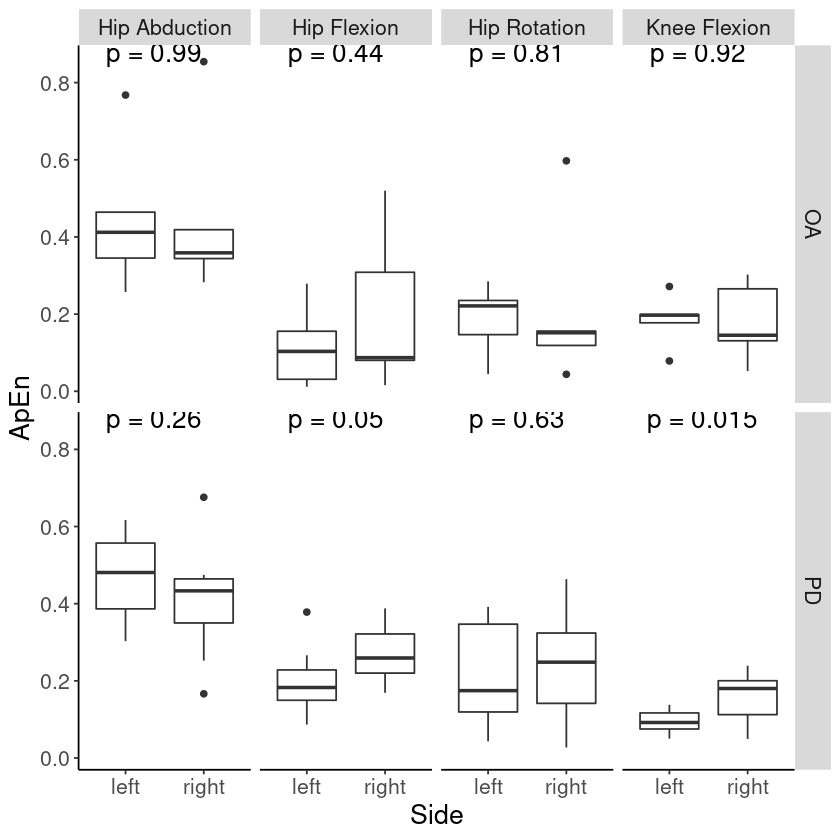

In [33]:
p.apen <- df.means %>%
    ggplot(aes(x=side,y=apen)) +
        facet_grid(rows=vars(group), cols=vars(limb_move), labeller=labeller(limb_move=limb.labs)) +
        # ggtitle("Left vs Right ApEn of Body Movement in PD and OA") +
        xlab('Side') +
        ylab('ApEn') +
        geom_boxplot() +
        stat_compare_means(method='t.test',symnum.args=symnum.list, 
                           label="p.format", method.args=list(var.equal=TRUE),
                           size=5.5) +
        pub_theme(16)
p.apen

In [34]:
# cowplot::save_plot('figures/joint_entropy_facet.jpeg',p.apen,ncol=2, nrow=2, dpi=1000)

__Why is this different from rstatix results?__

- Rstatix didn't actually do holms correction, because groupby separated them to independent means
- Boxplots in python included some points that were labeled as outliers by the ggpubr
- Boxplot whisker in ggpubr was much shorter than in python

In [35]:
df$dance_group %>% unique()

[1] "tango"   "line"    "foxtrot" "waltz"

In [36]:
df.new <- df.means %>%
    unite("dance_side", c("dance_group","side"), remove=FALSE)

__Nested Facets__

https://stackoverflow.com/questions/40316169/nested-facets-in-ggplot2-spanning-groups

- left side effected most
- gender roles in dance movement

In [37]:
library(ggh4x)

In [38]:
df.new %>% glimpse

Rows: 120
Columns: 8
Groups: id, group, dance_group, side [30]
$ id          <chr> "pddance001", "pddance001", "pddance001", "pddance001", "p…
$ group       <chr> "PD", "PD", "PD", "PD", "PD", "PD", "PD", "PD", "PD", "PD"…
$ dance_side  <chr> "tango_left", "tango_left", "tango_left", "tango_left", "t…
$ dance_group <chr> "tango", "tango", "tango", "tango", "tango", "tango", "tan…
$ side        <chr> "left", "left", "left", "left", "right", "right", "right",…
$ limb_move   <chr> "hip_abduction", "hip_flexion", "hip_rotation_ext", "knee_…
$ apen        <dbl> 0.61697711, 0.22914278, 0.04364859, 0.11785455, 0.46963949…
$ `n()`       <int> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1…


In [39]:
dance.labs <- c('Tango','Line','Foxtrot')
names(dance.labs) <- c('tango','line','foxtrot')

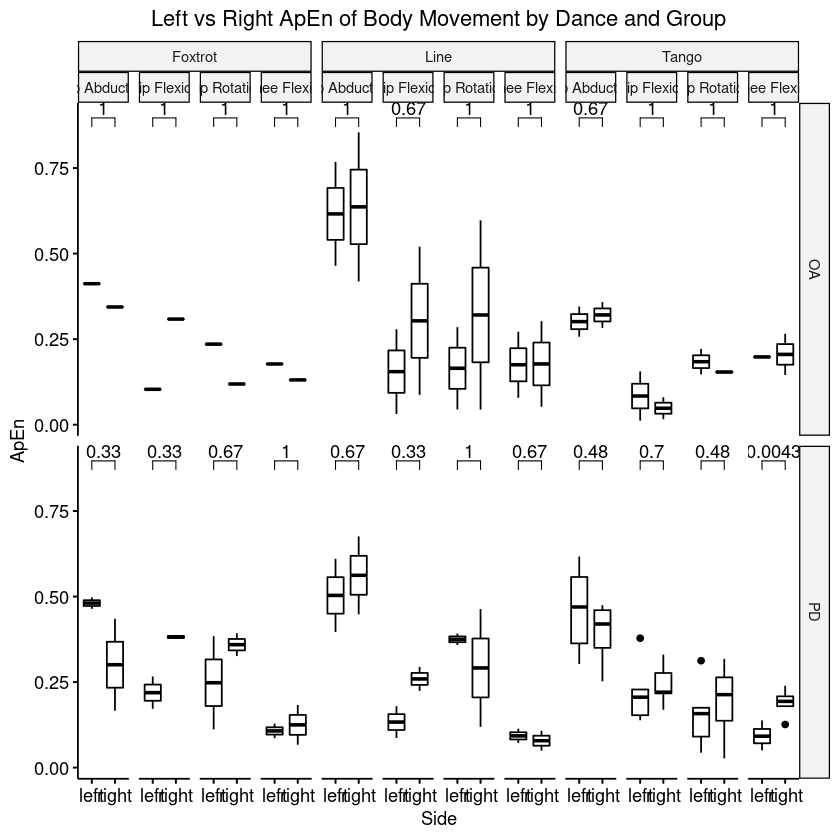

In [40]:
q.nested <- df.new %>%
    ggboxplot(x='side', y='apen') +
        facet_nested(group ~ dance_group + limb_move, labeller=labeller(limb_move=limb.labs, dance_group=dance.labs)) +
        stat_compare_means(comparisons=list(c('left','right'))) +
        # theme(axis.text.x = element_text(angle=45, hjust=1)) +
        ggtitle('Left vs Right ApEn of Body Movement by Dance and Group') +
        xlab('Side') +
        ylab('ApEn') +
        pub_theme(11)

q.nested

In [41]:
df %>% 
    group_by(group, dance_group, side) %>%
    get_summary_stats(apen, type='common')

group,dance_group,side,variable,n,min,max,median,iqr,mean,sd,se,ci
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
OA,foxtrot,left,apen,8,0.066,0.451,0.179,0.186,0.232,0.134,0.047,0.112
OA,foxtrot,right,apen,8,0.004,0.505,0.240,0.240,0.226,0.175,0.062,0.146
OA,line,left,apen,12,0.031,0.803,0.279,0.203,0.319,0.247,0.071,0.157
OA,line,right,apen,12,0.044,0.938,0.465,0.400,0.429,0.286,0.083,0.182
OA,tango,left,apen,16,0.012,0.345,0.195,0.053,0.190,0.079,0.020,0.042
OA,tango,right,apen,16,0.016,0.595,0.168,0.130,0.183,0.134,0.034,0.071
OA,waltz,left,apen,12,0.000,0.810,0.260,0.277,0.294,0.241,0.070,0.153
OA,waltz,right,apen,12,0.005,0.505,0.293,0.163,0.261,0.149,0.043,0.094
PD,foxtrot,left,apen,16,0.067,0.525,0.226,0.306,0.264,0.165,0.041,0.088


In [42]:
stat.test <- df %>%
    group_by(group, limb_move) %>%
    t_test(apen ~ side) %>%
    adjust_pvalue(method="bonferroni") %>%
    add_significance()
stat.test

,group,limb_move,.y.,group1,group2,n1,n2,statistic,df,p,p.adj,p.adj.signif
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,OA,hip_abduction,apen,left,right,12,12,-0.1544346,20.91932,0.879000,1.000000,ns
2,OA,hip_flexion,apen,left,right,12,12,-1.3751626,16.07483,0.188000,1.000000,ns
3,OA,hip_rotation_ext,apen,left,right,12,12,-0.6385427,17.19168,0.532000,1.000000,ns
4,OA,knee_flexion,apen,left,right,12,12,1.1413227,16.76037,0.270000,1.000000,ns
5,PD,hip_abduction,apen,left,right,20,20,2.1038222,37.98466,0.042100,0.336800,ns
6,PD,hip_flexion,apen,left,right,20,20,-2.0098841,37.88143,0.051600,0.412800,ns
7,PD,hip_rotation_ext,apen,left,right,20,20,-0.3311336,37.86766,0.742000,1.000000,ns
8,PD,knee_flexion,apen,left,right,20,20,-3.6823123,30.29817,0.000897,0.007176,**


In [43]:
# add xy positions for graphing
stat.test <- stat.test %>% add_xy_position(x='side')

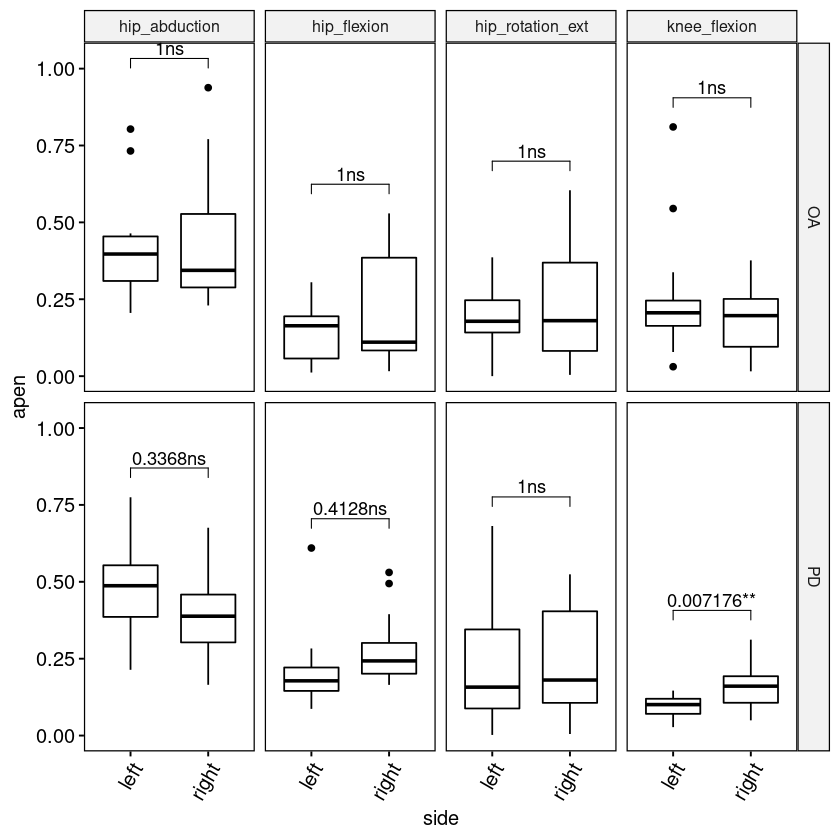

In [44]:
bxp <- ggboxplot(df, x = "side", y = "apen", facet.by=c("group",'limb_move')) +
        rotate_x_text(angle=60) +
        stat_pvalue_manual(stat.test, label='{p.adj}{p.adj.signif}')
bxp

# Tau

In [45]:
tau <- read.csv('data_formatted/tau_values.csv')

In [46]:
library(ggpubr)

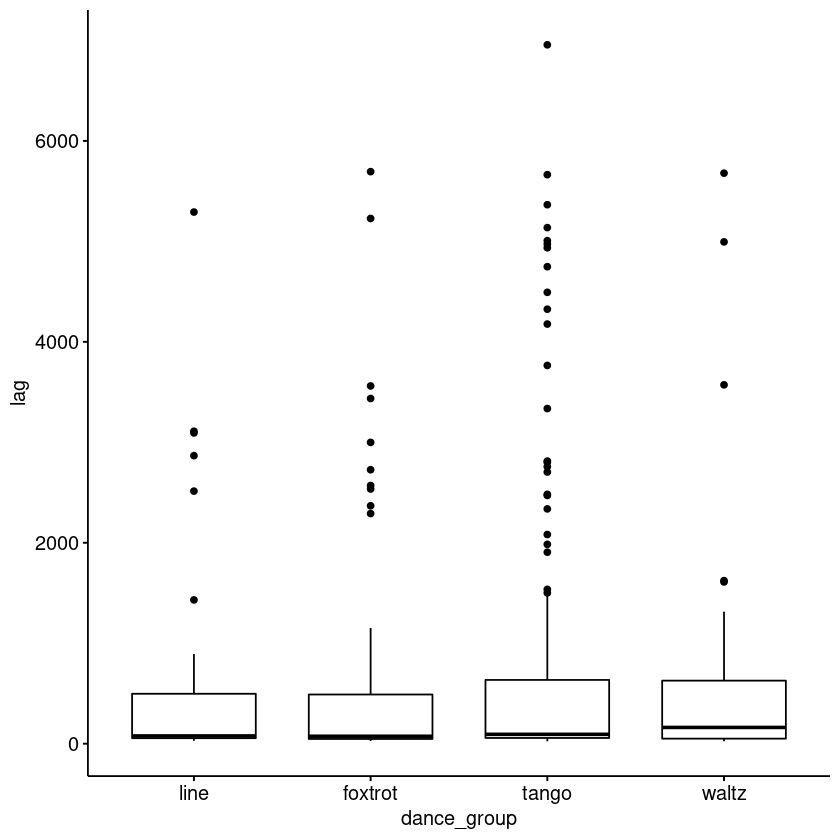

In [47]:
ggboxplot(tau, x='dance_group',y='lag')

In [48]:
#tau <- tau %>% mutate(dance_group = factor(dance_group))

In [49]:
tau.mean <- tau%>% group_by(id, dance_group) %>% summarize(avg_lag = mean(lag), avg_acf = mean(acf))

`summarise()` has grouped output by 'id'. You can override using the `.groups` argument.



In [91]:
cat_group <- function(my_id){
    if(grepl('cecon',my_id)){
        return('OA')
    }else{
        return('PD')
    }
}

In [51]:
tau.mean$group <- tau.mean %>% pull(id) %>% sapply(cat_group)

## Assumptions

In [52]:
library(rstatix)

### Outliers - pass

In [53]:
tau.mean %>% group_by(dance_group) %>% identify_outliers(avg_lag)

dance_group,id,avg_lag,avg_acf,group,is.outlier,is.extreme
<chr>,<chr>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>


In [54]:
tau.mean %>% group_by(dance_group) %>% identify_outliers(avg_acf)

dance_group,id,avg_lag,avg_acf,group,is.outlier,is.extreme
<chr>,<chr>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>
tango,pddancecon004,980.5333,0.0630504,OA,TRUE,FALSE


No extreme outliers

### Normality - pass

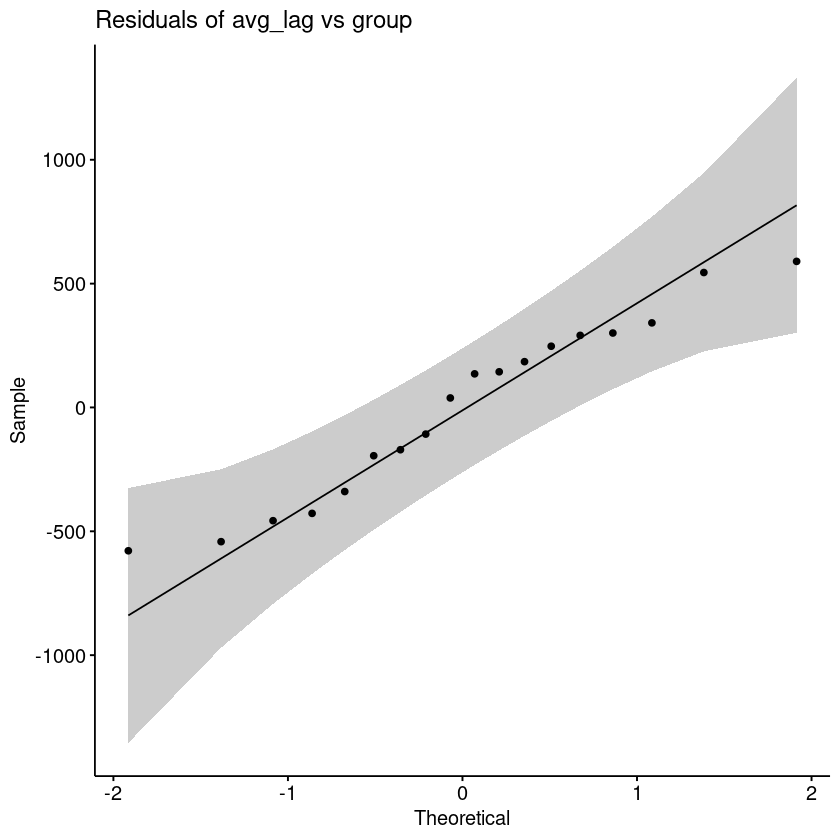

In [55]:
ggqqplot(residuals(lm(avg_lag ~ group, data=tau.mean))) +
    ggtitle('Residuals of avg_lag vs group')

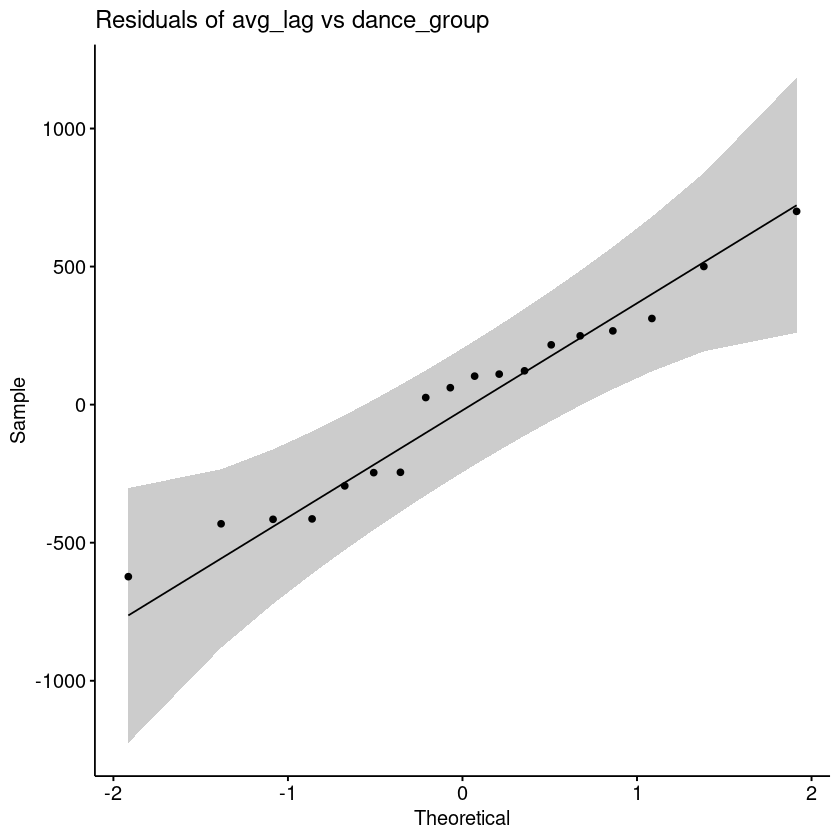

In [56]:
ggqqplot(residuals(lm(avg_lag ~ dance_group, data=tau.mean))) +
    ggtitle('Residuals of avg_lag vs dance_group')

Passes normality assumption

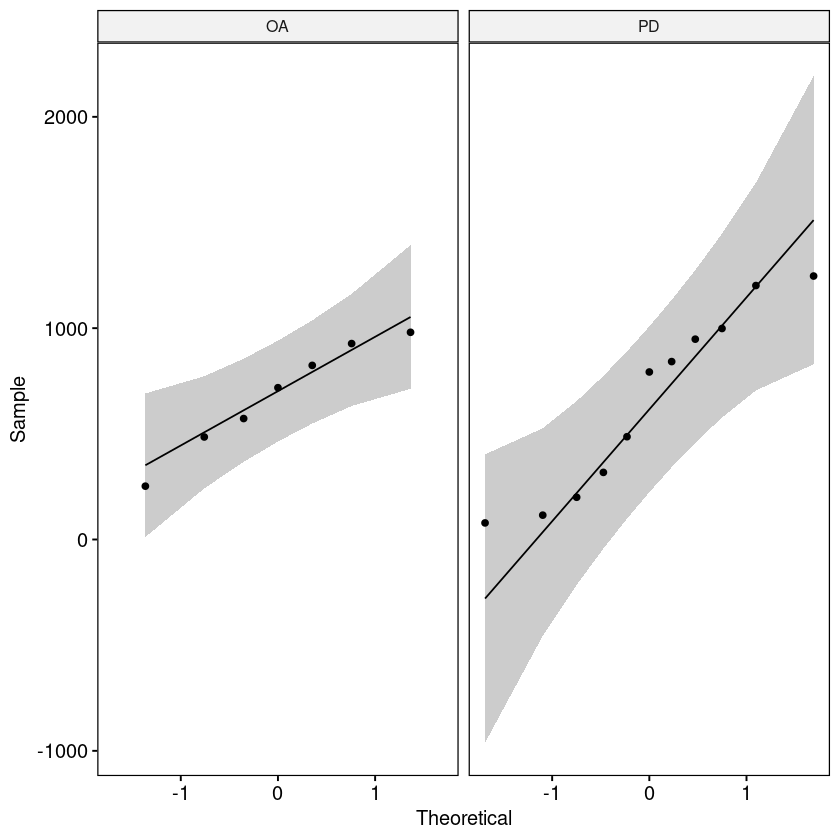

In [57]:
ggqqplot(tau.mean, 'avg_lag', facet.by='group')

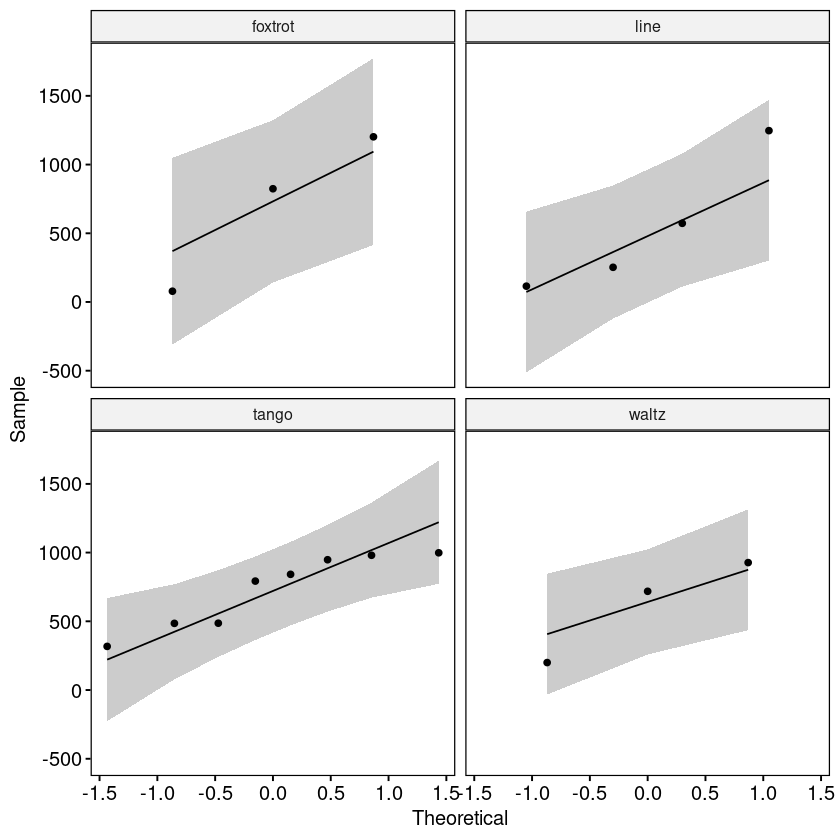

In [58]:
ggqqplot(tau.mean, 'avg_lag', facet.by='dance_group')

Still passes normality assumption

### Equality of variance

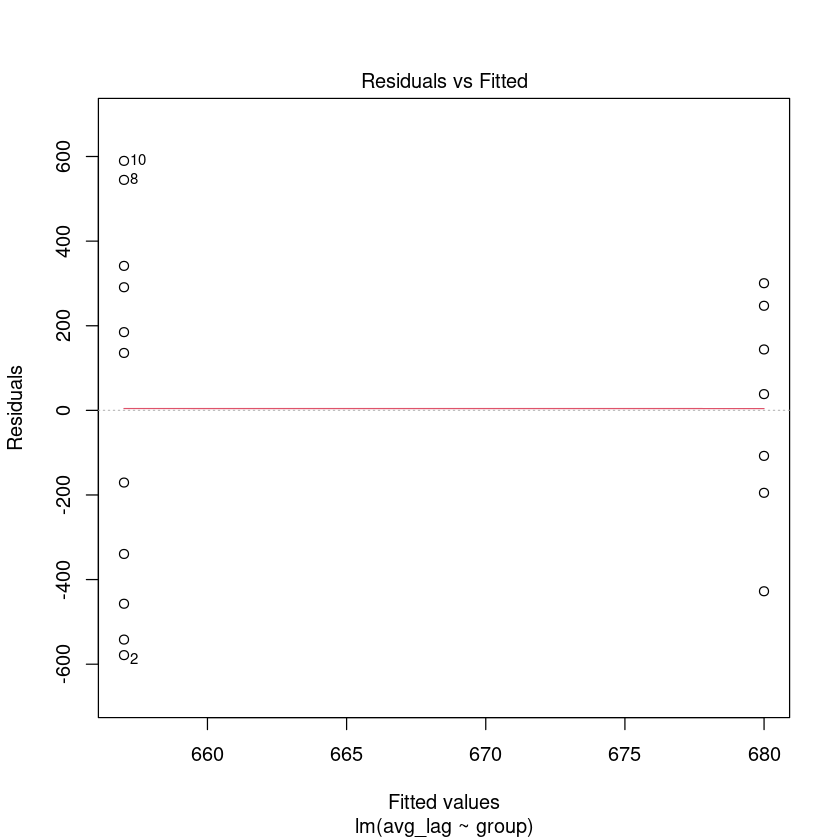

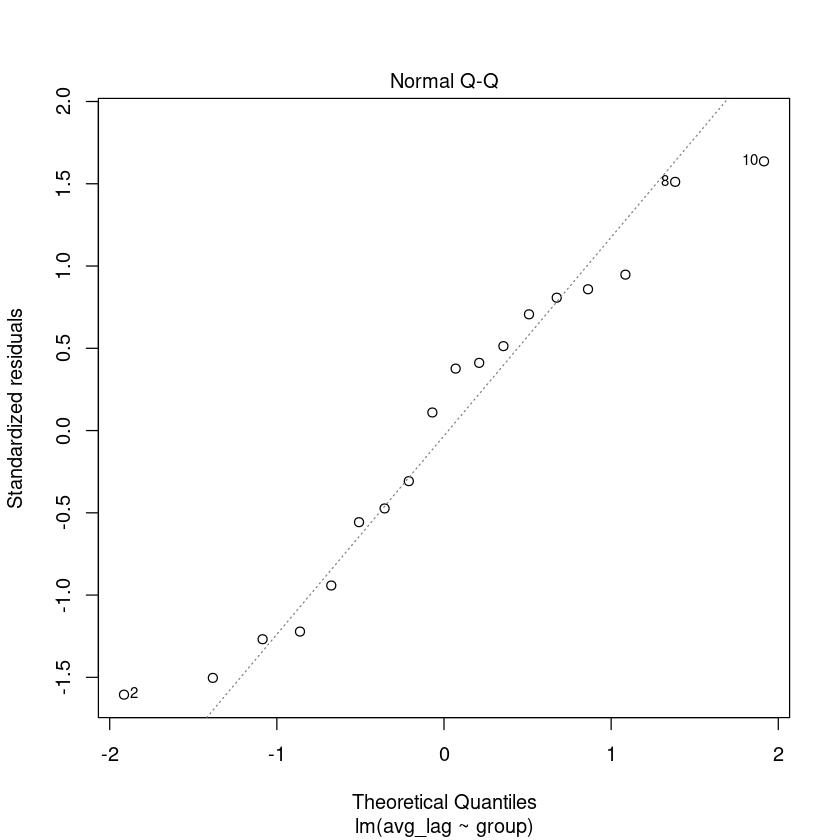

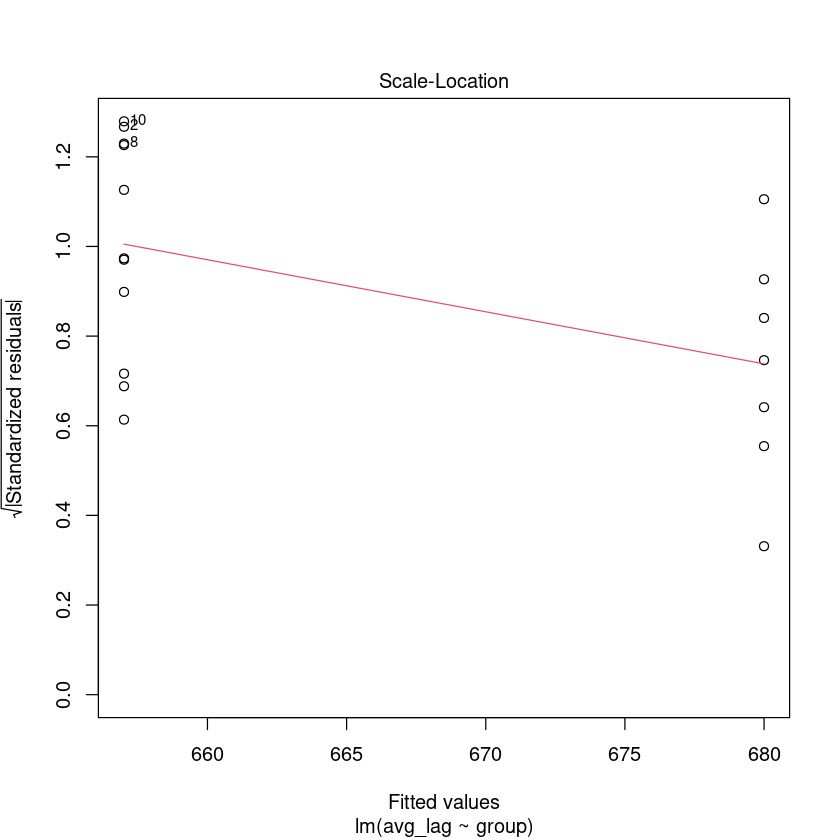

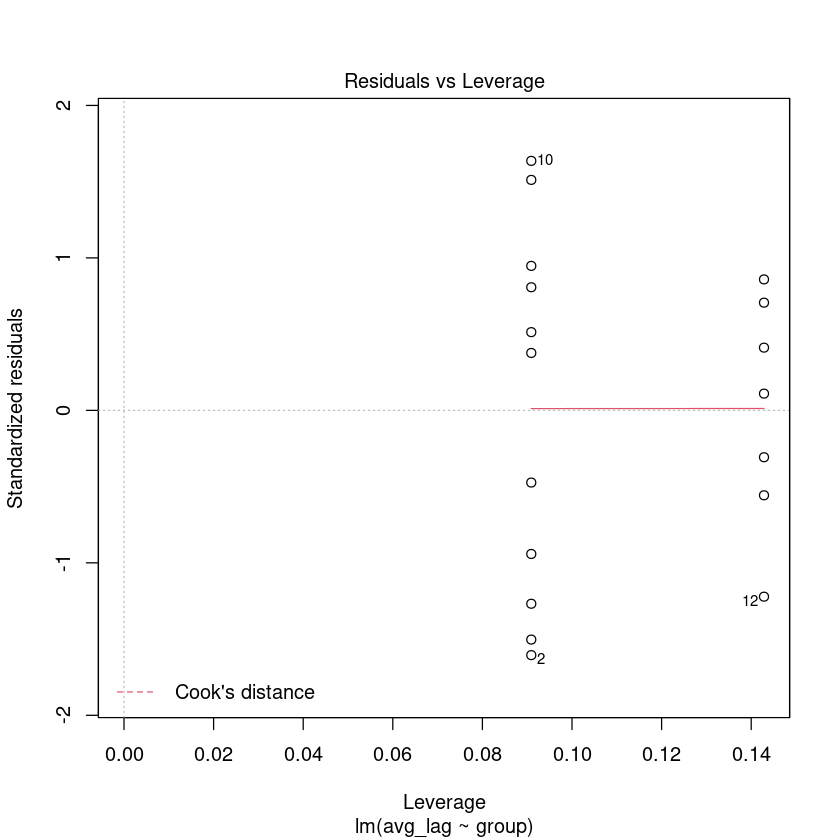

In [59]:
plot(lm(avg_lag ~ group, data=tau.mean))

Passed: Residuals vs Fitted graph shows no obvious pattern

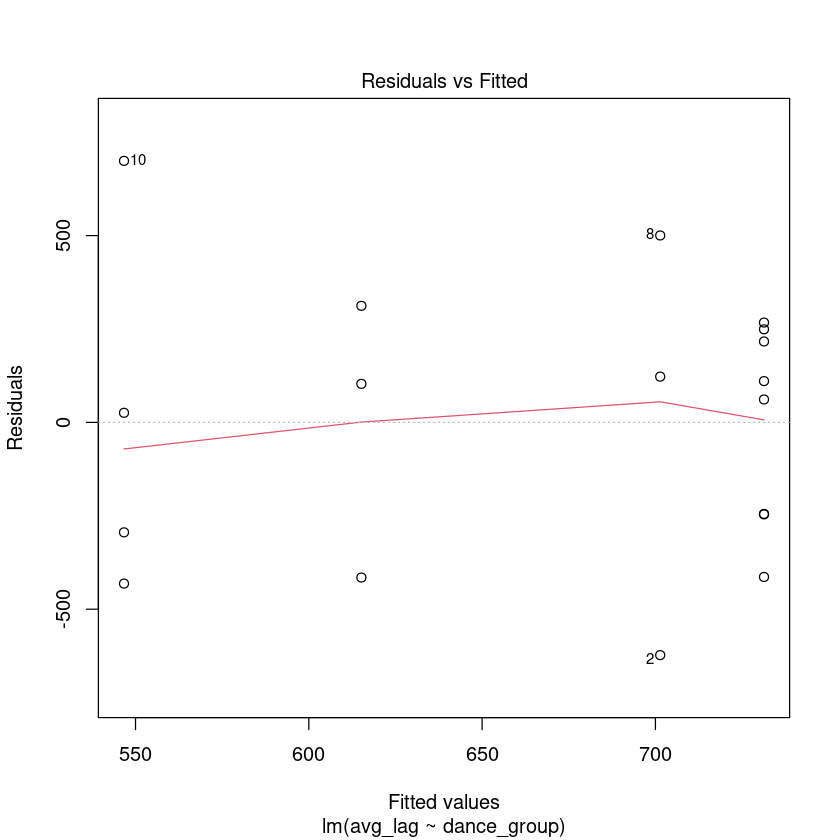

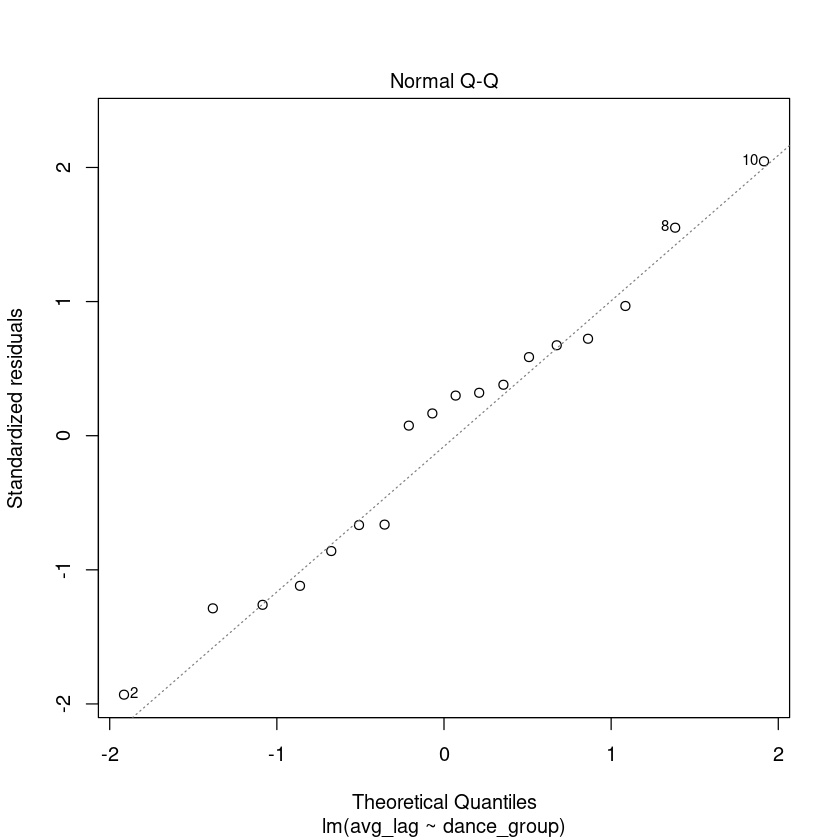

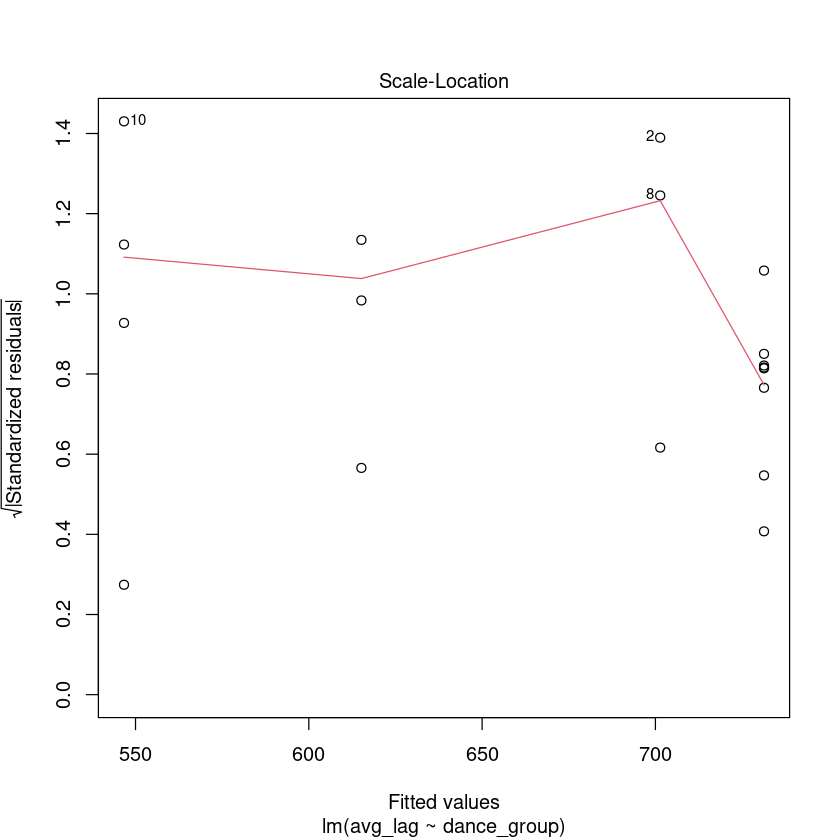

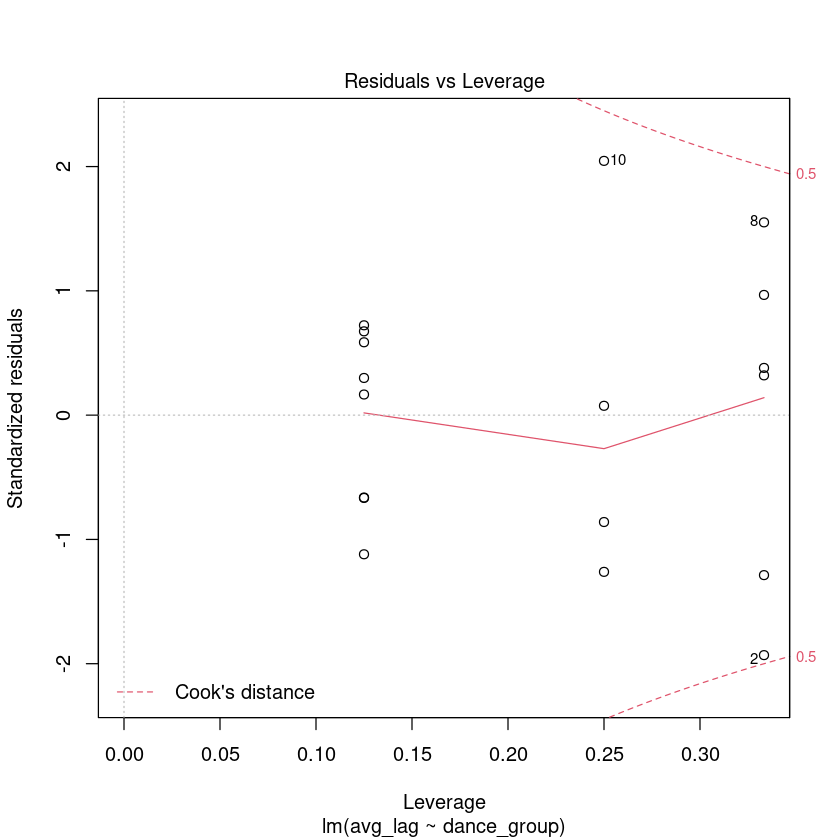

In [60]:
plot(lm(avg_lag ~ dance_group, data=tau.mean))

Passed: Residuals vs Fitted graph shows no obvious pattern

## ANOVA - dance group

In [61]:
pd.tau <- tau.mean %>% filter(group=='PD')
oa.tau <- tau.mean %>% filter(group=='OA')

### Tau

In [62]:
dance.aov <- aov(avg_lag ~ dance_group, data=tau.mean)
summary(dance.aov)

            Df  Sum Sq Mean Sq F value Pr(>F)
dance_group  3  102607   34202   0.219  0.882
Residuals   14 2185633  156117               

No significant difference in lag between dance groups. `F(3, 14) = 0.22, p = 0.88`

In [63]:
dance.aov <- aov(avg_lag ~ dance_group, data=pd.tau)
summary(dance.aov)

            Df  Sum Sq Mean Sq F value Pr(>F)
dance_group  3  243369   81123   0.347  0.793
Residuals    7 1636579  233797               

In [64]:
dance.aov <- aov(avg_lag ~ dance_group, data=oa.tau)
summary(dance.aov)

            Df Sum Sq Mean Sq F value Pr(>F)
dance_group  3 210304   70101   1.074  0.477
Residuals    3 195726   65242               

No significant difference in tau between dance groups for PD `(F(3, 7) = 0.35, p = 0.79)` or OA (`F(3, 3) = 1.07, p = 0.48`)

### ACF

In [65]:
dance.aov <- aov(avg_acf ~ dance_group, data=pd.tau)
summary(dance.aov)

            Df    Sum Sq   Mean Sq F value Pr(>F)
dance_group  3 0.0000123 4.110e-06   0.038  0.989
Residuals    7 0.0007552 1.079e-04               

In [66]:
dance.aov <- aov(avg_acf ~ dance_group, data=oa.tau)
summary(dance.aov)

            Df    Sum Sq   Mean Sq F value Pr(>F)
dance_group  3 0.0002343 7.811e-05   0.393  0.768
Residuals    3 0.0005958 1.986e-04               

No significant difference in ACF between dance groups for PD `(F(3, 7) = 0.04, p = 0.99)` or OA (`F(3, 3) = 0.39, p = 0.77`)

## t test - pd vs oa

In [67]:
tau.mean %>% head

id,dance_group,avg_lag,avg_acf,group
<chr>,<chr>,<dbl>,<dbl>,<chr>
pddance001,tango,792.7000,0.02547531,PD
pddance002,foxtrot,78.4500,0.02111884,PD
pddance002,line,115.2000,0.01297114,PD
pddance002,tango,317.5667,0.02042861,PD
pddance002,waltz,199.9000,0.02681196,PD
pddance003,tango,998.5000,0.02505717,PD


In [68]:
group.t <- t.test(avg_lag ~ group, tau.mean)
group.t


	Welch Two Sample t-test

data:  avg_lag by group
t = 0.14058, df = 15.987, p-value = 0.89
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -323.7967  369.7889
sample estimates:
mean in group OA mean in group PD 
        679.9976         657.0015 


No significant difference in lag between groups. `t(15.99) = 0.14, p = 0.89`

In [69]:
group.t <- t.test(avg_acf ~ group, tau.mean)
group.t


	Welch Two Sample t-test

data:  avg_acf by group
t = 3.1822, df = 10.22, p-value = 0.009528
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.004967252 0.027945214
sample estimates:
mean in group OA mean in group PD 
      0.04381738       0.02736114 


Significant difference in ACF at which tau was found between groups. `t(10.22) = 3.18, p = 0.01`

# Demographics

In [70]:
demos <- read.csv('data_formatted/demos_merged.csv')
demos %>% head

,id,group,sex,age,bmi,heightin,weightlbs
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,pddancecon001,control,female,68,26.3,59,130
2,pddancecon002,control,male,75,20.1,69,136
3,pddancecon003,control,male,71,24.2,66,150
4,pddancecon004,control,female,71,32.1,61,170
5,pddancecon005,control,female,80,24.0,64,140
6,pddance001,pd,male,NA,NA,73,NA


## Assumptions

Source: [T-test in R at Datanovia](https://www.datanovia.com/en/lessons/t-test-in-r/#assumptions-and-preliminary-tests-1)

### Outliers - pass

In [71]:
demos %>% group_by(group) %>% identify_outliers(bmi)

group,id,sex,age,bmi,heightin,weightlbs,is.outlier,is.extreme
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
control,pddancecon002,male,75,20.1,69,136,TRUE,FALSE
control,pddancecon004,female,71,32.1,61,170,TRUE,FALSE


In [72]:
demos %>% group_by(group) %>% identify_outliers(age)

group,id,sex,age,bmi,heightin,weightlbs,is.outlier,is.extreme
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>


No extreme outliers

### Normality - pass

In [73]:
demos %>% group_by(group) %>% shapiro_test(bmi)

group,variable,statistic,p
<chr>,<chr>,<dbl>,<dbl>
control,bmi,0.9430173,0.6873422
pd,bmi,0.9423394,0.6825219


In [74]:
demos %>% group_by(group) %>% shapiro_test(age)

group,variable,statistic,p
<chr>,<chr>,<dbl>,<dbl>
control,age,0.9295752,0.5934766
pd,age,0.9700690,0.8756966


Passed

### Equality of variance - pass

In [75]:
demos %>% levene_test(bmi ~ group)

Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”


df1,df2,statistic,p
<int>,<int>,<dbl>,<dbl>
1,8,0.008670056,0.9281033


In [76]:
demos %>% levene_test(age ~ group)

Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”


df1,df2,statistic,p
<int>,<int>,<dbl>,<dbl>
1,8,0.4889976,0.5041952


## Effect size

In [77]:
demos %>% cohens_d(bmi ~ group, var.equal = TRUE)

,.y.,group1,group2,effsize,n1,n2,magnitude
,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<ord>
1,bmi,control,pd,-0.2616117,5,6,small


In [78]:
demos %>% cohens_d(age ~ group, var.equal = TRUE)

,.y.,group1,group2,effsize,n1,n2,magnitude
,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<ord>
1,age,control,pd,0.6425755,5,6,moderate


## t test - bmi

In [79]:
demos %>% t_test(bmi ~ group)

,.y.,group1,group2,n1,n2,statistic,df,p
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,bmi,control,pd,5,6,-0.4136444,7.862889,0.69


In [80]:
demos %>% t_test(age ~ group)

,.y.,group1,group2,n1,n2,statistic,df,p
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,age,control,pd,5,6,1.016001,6.676857,0.345


# Recording Length

In [81]:
records <- read.csv('data_formatted/dance_recordings.csv')
records <- records %>% filter(dance_group != 'waltz')

In [82]:
records.avg <- records %>% group_by(dance_group, id) %>% summarize(avg_sec = mean(seconds),
                                                    avg_min = mean(minutes))
records.avg$group <- records.avg %>% pull(id) %>% sapply(cat_group)

records.avg 

`summarise()` has grouped output by 'dance_group'. You can override using the `.groups` argument.



dance_group,id,avg_sec,avg_min,group
<chr>,<chr>,<dbl>,<dbl>,<chr>
foxtrot,pddance002,48.65000,0.8108333,PD
foxtrot,pddance006,167.90000,2.7983333,PD
foxtrot,pddancecon003,191.12000,3.1853333,OA
line,pddance002,66.92000,1.1153333,PD
line,pddance007,176.24000,2.9373333,PD
line,pddancecon001,87.24000,1.4540000,OA
line,pddancecon005,330.58000,5.5096667,OA
tango,pddance001,131.67000,2.1945000,PD
tango,pddance002,60.01333,1.0002222,PD


In [83]:
t.test(avg_sec ~ group, records.avg)


	Welch Two Sample t-test

data:  avg_sec by group
t = 1.6277, df = 5.7475, p-value = 0.1569
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -36.57269 177.38202
sample estimates:
mean in group OA mean in group PD 
        202.2360         131.8313 


In [84]:
summary(aov(avg_sec ~ dance_group, records.avg))

            Df Sum Sq Mean Sq F value Pr(>F)
dance_group  2   1568     784   0.125  0.883
Residuals   12  75142    6262               

No significant difference in mean recording length between dance group `F(3, 13) = 0.18, p = 0.91` or PD and control `t(9.19) = 2.06, p = 0.07`.

# Means

Hypothesis: there is a sig diff in mean movement of left and right side in PD but not OA

In [95]:
joints$group <- joints %>% pull(unique_id) %>% sapply(cat_group)

In [96]:
joints.mean <- joints %>% group_by(dance_group, id, group) %>% summarize(left.hip.flex = mean(joints.hip_lt.flexion_.deg.),
                                                   right.hip.flex = mean(joints.hip_rt.flexion_.deg.),
                                                   left.hip.abd = mean(joints.hip_lt.abduction_.deg.),
                                                   right.hip.abd = mean(joints.hip_rt.abduction_.deg.),
                                                   left.hip.rot = mean(joints.hip_lt.rotation_ext_.deg.),
                                                   right.hip.rot = mean(joints.hip_rt.rotation_ext_.deg.),
                                                   left.knee.flex = mean(joints.knee_lt.flexion_.deg.),
                                                   right.knee.flex = mean(joints.knee_rt.flexion_.deg.))
joints.mean %>% glimpse

`summarise()` has grouped output by 'dance_group', 'id'. You can override using the `.groups` argument.



Rows: 18
Columns: 11
Groups: dance_group, id [18]
$ dance_group     <chr> "foxtrot", "foxtrot", "foxtrot", "line", "line", "line…
$ id              <chr> "pddance002", "pddance006", "pddancecon003", "pddance0…
$ group           <chr> "PD", "PD", "OA", "PD", "PD", "OA", "OA", "PD", "PD", …
$ left.hip.flex   <dbl> 8.99551136, 13.70394667, 26.06204464, 4.12050768, 18.5…
$ right.hip.flex  <dbl> 5.470688, 5.955388, 15.562712, 22.149595, 17.065435, 2…
$ left.hip.abd    <dbl> -7.0422963, 1.4286839, 0.7888491, -4.9561885, -3.75289…
$ right.hip.abd   <dbl> 6.83216949, -0.02462347, 4.55787830, -4.95532920, 6.35…
$ left.hip.rot    <dbl> -5.816687, -24.046135, -2.225780, 18.683551, 22.318079…
$ right.hip.rot   <dbl> -2.40926696, 9.68897957, 22.85558030, 1.59722170, -42.…
$ left.knee.flex  <dbl> 2.318686, 9.283924, 17.582418, 6.500918, 23.405926, 23…
$ right.knee.flex <dbl> 10.570314, 9.805412, 23.332723, 25.649260, 23.994234, …


In [97]:
joints.mean %>% head()

dance_group,id,group,left.hip.flex,right.hip.flex,left.hip.abd,right.hip.abd,left.hip.rot,right.hip.rot,left.knee.flex,right.knee.flex
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
foxtrot,pddance002,PD,8.995511,5.470688,-7.0422963,6.83216949,-5.816687,-2.40926696,2.318686,10.570314
foxtrot,pddance006,PD,13.703947,5.955388,1.4286839,-0.02462347,-24.046135,9.68897957,9.283924,9.805412
foxtrot,pddancecon003,OA,26.062045,15.562712,0.7888491,4.55787830,-2.225780,22.85558030,17.582418,23.332723
line,pddance002,PD,4.120508,22.149595,-4.9561885,-4.95532920,18.683551,1.59722170,6.500918,25.649260
line,pddance007,PD,18.504976,17.065435,-3.7528949,6.35806610,22.318079,-42.03862134,23.405926,23.994234
line,pddancecon001,OA,29.288387,22.952127,0.6177143,-1.12547070,-4.482351,0.05153767,23.847550,20.986403


In [98]:
joints.long <- joints.mean %>% pivot_longer(cols=c(left.hip.flex, right.hip.flex, left.hip.abd, right.hip.abd, 
                                    left.hip.rot, right.hip.rot, left.knee.flex, right.knee.flex),
                             names_to='limb_move_side',
                             values_to='mean')

In [99]:
joints.long <- joints.long %>% filter(dance_group != 'rumba', dance_group != 'swing', dance_group != 'waltz')

In [100]:
# extract side of movement
pick_side <- function(my_side){
    if(grepl('left',my_side)){
        return('left')
    }else{
        return('right')
    }
}

# extract limb movement
pick_limb <- function(my_limb){
    if(grepl('hip.flex', my_limb)){
        return('hip_flexion')
    } else if (grepl('hip.rot', my_limb)){
        return('hip_rotation')
    } else if (grepl('hip.abd', my_limb)){
        return('hip_abduction')
    } else if (grepl('knee.flex', my_limb)){
        return('knee_flexion')
    }
}

In [101]:
joints.long$side <- joints.long %>% pull(limb_move_side) %>% sapply(pick_side)
joints.long$limb_move <- joints.long %>% pull(limb_move_side) %>% sapply(pick_limb)

In [102]:
pd <- joints.long %>% filter(group == 'pd')
oa <- joints.long %>% filter(group == 'control')

## Assumptions

Source: [T-test in R at Datanovia](https://www.datanovia.com/en/lessons/t-test-in-r/#assumptions-and-preliminary-tests-1)

### Outliers - pd pass, 1 oa fail

In [103]:
pd %>% group_by(limb_move_side) %>% identify_outliers(mean)

ERROR: Error in .results$data[[1]]: subscript out of bounds


No extreme outliers

In [104]:
oa %>% group_by(limb_move_side) %>% identify_outliers(mean)

ERROR: Error in .results$data[[1]]: subscript out of bounds


1 extreme outlier in left hip abduction

### Normality - pd pass, 1 oa fail

In [105]:
pd %>% group_by(limb_move_side) %>% shapiro_test(mean)

ERROR: Error in .results$data[[1]]: subscript out of bounds


Passed

In [92]:
oa %>% group_by(limb_move_side) %>% shapiro_test(mean)

limb_move_side,variable,statistic,p
<chr>,<chr>,<dbl>,<dbl>
left.hip.abd,mean,0.7580363,0.03526599
left.hip.flex,mean,0.8580201,0.22122645
left.hip.rot,mean,0.9016223,0.41891683
left.knee.flex,mean,0.9082194,0.45696429
right.hip.abd,mean,0.9796730,0.90009759
right.hip.flex,mean,0.9681840,0.83020730
right.hip.rot,mean,0.9646589,0.80818134
right.knee.flex,mean,0.9388120,0.65755166


Failed normality assumption: OA left hip abduction

### Equality of variance - pd pass, oa fail

In [93]:
pd %>%  group_by(limb_move) %>% levene_test(mean ~ side)

Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”
Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”
Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”
Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”


limb_move,df1,df2,statistic,p
<chr>,<int>,<int>,<dbl>,<dbl>
hip_abduction,1,16,0.02915656,0.8665587
hip_flexion,1,16,0.07836713,0.7831094
hip_rotation,1,16,0.01106071,0.9175482
knee_flexion,1,18,0.35001151,0.5614641


Passed equality of variance

In [94]:
oa %>%  group_by(limb_move) %>% levene_test(mean ~ side)

Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”
Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”
Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”
Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”


limb_move,df1,df2,statistic,p
<chr>,<int>,<int>,<dbl>,<dbl>
hip_abduction,1,7,1.0137962,0.34752452
hip_flexion,1,7,0.3761572,0.55906022
hip_rotation,1,7,7.9583916,0.02573402
knee_flexion,1,8,0.3197603,0.58725623


Failed equality of variance: OA hip abduction

## Effect size

In [95]:
pd %>% group_by(limb_move) %>% cohens_d(mean ~ side, var.equal = TRUE)

,.y.,group1,group2,effsize,limb_move,n1,n2,magnitude
,<chr>,<chr>,<chr>,<dbl>,<chr>,<int>,<int>,<ord>
1,mean,left,right,-0.6149203,hip_abduction,10,10,moderate
2,mean,left,right,0.1651966,hip_flexion,10,10,negligible
3,mean,left,right,1.1599981,hip_rotation,10,10,large
4,mean,left,right,-0.2079479,knee_flexion,10,10,small


In [96]:
oa %>% group_by(limb_move) %>% cohens_d(mean ~ side, var.equal = TRUE)

,.y.,group1,group2,effsize,limb_move,n1,n2,magnitude
,<chr>,<chr>,<chr>,<dbl>,<chr>,<int>,<int>,<ord>
1,mean,left,right,-1.31969609,hip_abduction,5,5,large
2,mean,left,right,0.63146835,hip_flexion,5,5,moderate
3,mean,left,right,-0.72955351,hip_rotation,5,5,moderate
4,mean,left,right,-0.05129923,knee_flexion,5,5,negligible


## t test

In [97]:
joints.long2 <- joints.long %>% mutate('limb_move' = factor(limb_move))

In [98]:
joints.long.l <- joints.long %>% filter(side == 'left')
joints.long.r <- joints.long %>% filter(side == 'right')

In [99]:
joints.long.l$right <- joints.long.r$mean
pd <- joints.long.l %>% filter(group == 'pd') %>% mutate(left=mean)
oa <- joints.long.l %>% filter(group == 'control') %>% mutate(left=mean)

In [100]:
joints.long %>% group_by(limb_move, group) %>% summarise(n())

`summarise()` has grouped output by 'limb_move'. You can override using the `.groups` argument.



limb_move,group,n()
<chr>,<chr>,<int>
hip_abduction,control,10
hip_abduction,pd,20
hip_flexion,control,10
hip_flexion,pd,20
hip_rotation,control,10
hip_rotation,pd,20
knee_flexion,control,10
knee_flexion,pd,20


In [101]:
pd.result <- by(pd, list(pd$limb_move), 
    function(x) t.test(x$left, x$right, mu=0, alt="two.sided",conf.level = 0.95, var.equal=TRUE, na.action=na.omit))
pd.result

: hip_abduction

	Two Sample t-test

data:  x$left and x$right
t = -1.3044, df = 16, p-value = 0.2105
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -7.025131  1.672940
sample estimates:
mean of x mean of y 
-1.390407  1.285689 

------------------------------------------------------------ 
: hip_flexion

	Two Sample t-test

data:  x$left and x$right
t = 0.35043, df = 16, p-value = 0.7306
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -5.223057  7.291858
sample estimates:
mean of x mean of y 
10.795926  9.761525 

------------------------------------------------------------ 
: hip_rotation

	Two Sample t-test

data:  x$left and x$right
t = 2.4607, df = 16, p-value = 0.02562
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  2.805976 37.712168
sample estimates:
mean of x mean of y 
 10.11508 -10.14399 

------------------------------

In [102]:
oa.result <- by(oa, list(oa$limb_move), 
    function(x) t.test(x$left, x$right, mu=0, alt="two.sided",conf.level = 0.95, var.equal=TRUE))
oa.result

: hip_abduction

	Two Sample t-test

data:  x$left and x$right
t = -1.9673, df = 7, p-value = 0.08985
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -8.0922170  0.7422454
sample estimates:
 mean of x  mean of y 
-0.1703037  3.5046821 

------------------------------------------------------------ 
: hip_flexion

	Two Sample t-test

data:  x$left and x$right
t = 0.94134, df = 7, p-value = 0.3779
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -7.589206 17.627946
sample estimates:
mean of x mean of y 
 22.53342  17.51405 

------------------------------------------------------------ 
: hip_rotation

	Two Sample t-test

data:  x$left and x$right
t = -1.0876, df = 7, p-value = 0.3128
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -22.814354   8.439752
sample estimates:
  mean of x   mean of y 
-0.01361022  7.17369096 

----------------

## Graphing

In [106]:
library(ggpubr)

In [107]:
# symbols to use
symnum.list <- list(cutpoints = c(0, 0.0001, 0.001, 0.01, 0.05, 1), symbols = c("****", "***", "**", "*", "ns"))

# prettier labels
limb.labs2 <- c('Hip Abduction','Hip Flexion','Hip Rotation','Knee Flexion')
names(limb.labs2) <- c('hip_abduction','hip_flexion','hip_rotation','knee_flexion')

group.labs <- c('OA','PD')
names(group.labs) <- c('control','pd')

Warning message:
“Removed 9 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 9 rows containing non-finite values (stat_compare_means).”


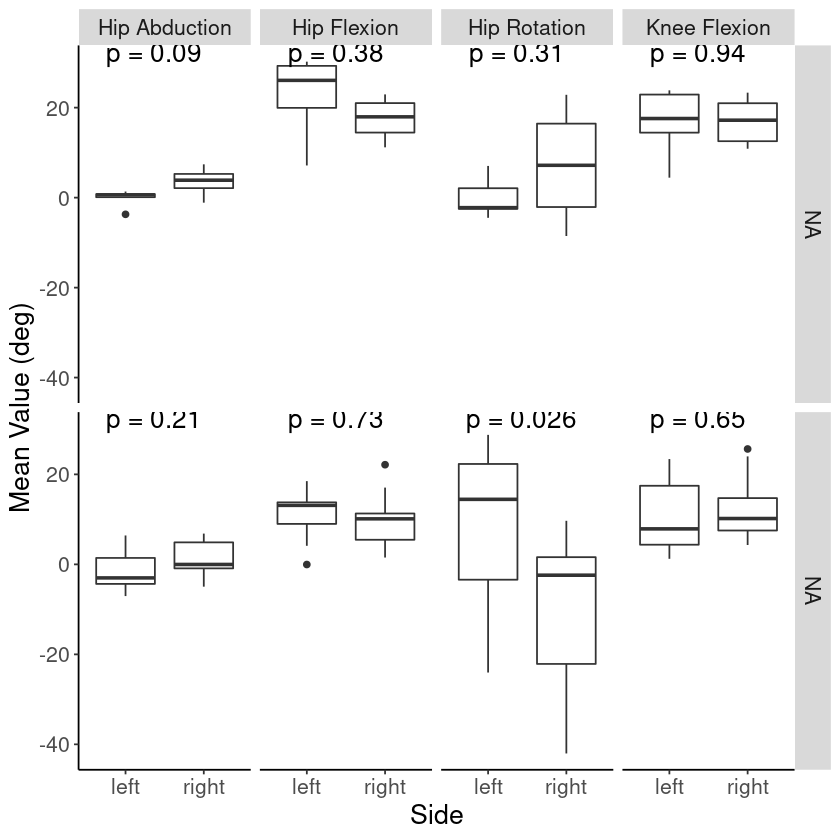

In [108]:
p.avg <- joints.long %>%
    ggplot(aes(x=side,y=mean)) +
        facet_grid(rows=vars(group), cols=vars(limb_move),labeller=labeller(limb_move=limb.labs2, group=group.labs)) +
        # ggtitle("Left vs Right Mean Body Movement in PD and OA") +
        xlab('Side') +
        ylab('Mean Value (deg)') +
        geom_boxplot() +
        stat_compare_means(method='t.test',symnum.args=symnum.list,
                           label="p.format", method.args=list(var.equal=TRUE),
                           size=5.5) +
        pub_theme(16)
p.avg

In [109]:
# cowplot::save_plot('figures/joint_mean_facet.jpeg',p,ncol=2, nrow=2, dpi=1000)

In [110]:
p.apen <- p.apen + pub_theme(22)
p.avg <- p.avg + pub_theme(22)

Warning message:
“Removed 9 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 9 rows containing non-finite values (stat_compare_means).”


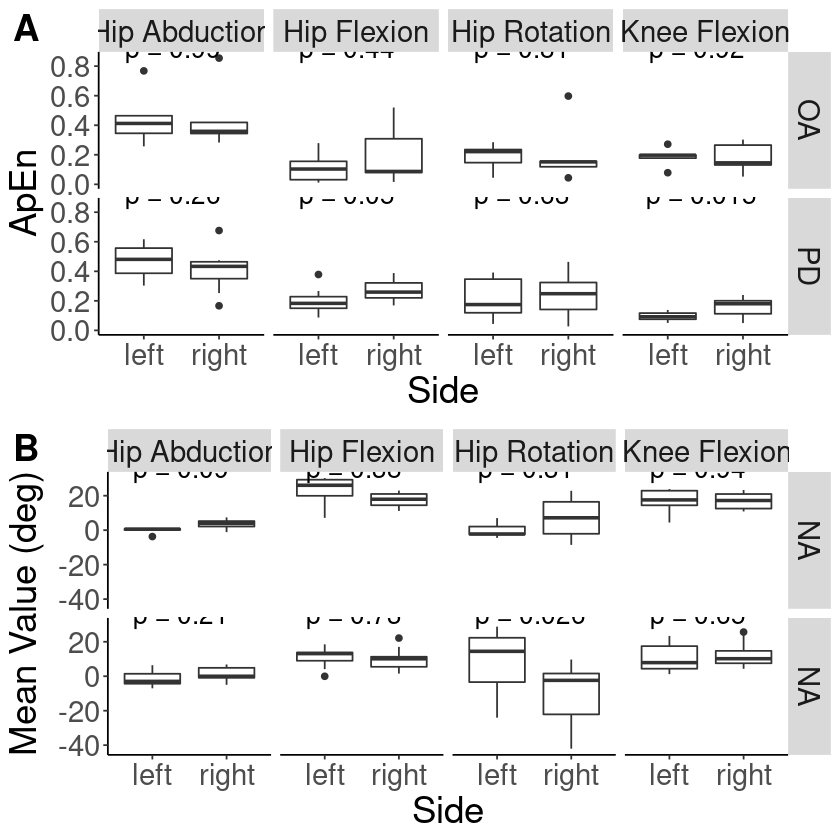

In [111]:
p.grid <- cowplot::plot_grid(p.apen, p.avg, nrow=2, labels='AUTO', label_size=22)
p.grid

In [112]:
cowplot::save_plot('figures/figure5.jpeg',p.grid,nrow=2, base_height=8, dpi=1000)

In [113]:
df.new <- joints.long %>%
    unite("dance_side", c("dance_group","side"), remove=FALSE)

In [114]:
dance.labs <- c('Tango','Line','Foxtrot')
names(dance.labs) <- c('tango','line','foxtrot')

In [115]:
joints.long %>% glimpse

Rows: 120
Columns: 7
Groups: dance_group, id [15]
$ dance_group    <chr> "foxtrot", "foxtrot", "foxtrot", "foxtrot", "foxtrot", …
$ id             <chr> "pddance002", "pddance002", "pddance002", "pddance002",…
$ group          <chr> "PD", "PD", "PD", "PD", "PD", "PD", "PD", "PD", "PD", "…
$ limb_move_side <chr> "left.hip.flex", "right.hip.flex", "left.hip.abd", "rig…
$ mean           <dbl> 8.99551136, 5.47068781, -7.04229627, 6.83216949, -5.816…
$ side           <chr> "left", "right", "left", "right", "left", "right", "lef…
$ limb_move      <chr> "hip_flexion", "hip_flexion", "hip_abduction", "hip_abd…


Warning message:
“Removed 9 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 9 rows containing non-finite values (stat_signif).”


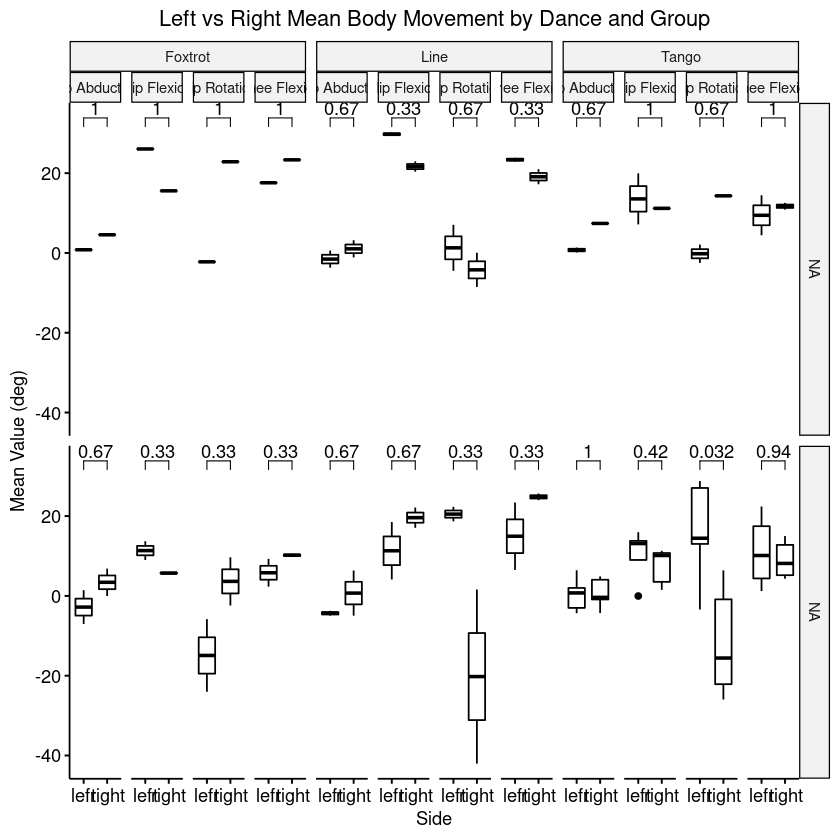

In [116]:
q.means <- joints.long %>%
    ggboxplot(x='side', y='mean') +
        ggh4x::facet_nested(group ~ dance_group + limb_move, labeller=labeller(group=group.labs, limb_move = limb.labs2, dance_group = dance.labs)) +
        stat_compare_means(comparisons=list(c('left','right'))) +
        # theme(axis.text.x = element_text(angle=45, hjust=1)) +
        ggtitle('Left vs Right Mean Body Movement by Dance and Group') +
        xlab('Side') +
        ylab('Mean Value (deg)') +
        pub_theme(11)

q.means